# scplotter to work with Vizgen Mouse Brain Receptor Map data prepared by Giotto

See: <https://drieslab.github.io/Giotto_website/articles/vizgen_mouse_brain.html>

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

In [1]:
library(Giotto)

# Ensure Giotto can access a python env
genv_exists <- suppressMessages(checkGiottoEnvironment())
print(genv_exists)

python_path <- file.path(Sys.getenv("HOME"), "miniconda3", "envs", "giotto_env", "bin", "python")
Sys.setenv(RETICULATE_PYTHON = python_path)

invisible(capture.output(suppressMessages(set_giotto_python_path(python_path = python_path))))

# library(scplotter)
devtools::load_all()

Loading required package: GiottoClass

Newer devel version of GiottoClass on GitHub: 0.4.8

Giotto Suite 4.2.1



[1] TRUE


ℹ Loading scplotter


In [3]:
g <- GiottoData::loadGiottoMini(dataset = "vizgen")
g

1. read Giotto object



2. read Giotto feature information

3. read Giotto spatial information

3.1 read Giotto spatial shape information

3.2 read Giotto spatial centroid information

3.3 read Giotto spatial overlap information

4. read Giotto image information

python already initialized in this session
 active environment : 'giotto_env'
 python version : 3.10



An object of class giotto 
>Active spat_unit:  z0 
>Active feat_type:  rna 
dimensions    : 337, 498 (features, cells)
[SUBCELLULAR INFO]
polygons      : z0 z1 aggregate 
features      : rna 
[AGGREGATE INFO]
expression -----------------------
  [z0][rna] raw
  [z1][rna] raw
  [aggregate][rna] raw normalized scaled pearson
spatial locations ----------------
  [z0] raw
  [z1] raw
  [aggregate] raw
spatial networks -----------------
  [aggregate] Delaunay_network kNN_network
spatial enrichments --------------
  [aggregate][rna] cluster_metagene
dim reduction --------------------
  [aggregate][rna] pca umap tsne
nearest neighbor networks --------
  [aggregate][rna] sNN.pca
attached images ------------------
images      : 4 items...


Use objHistory() to see steps and params used

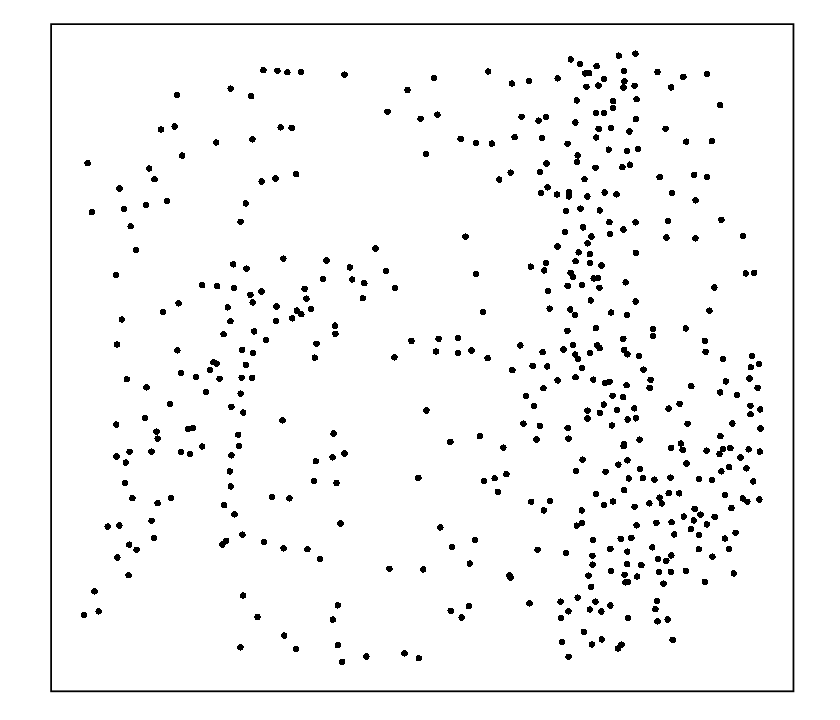

In [10]:
options(repr.plot.width = 7, repr.plot.height = 6)

SpatDimPlot(g)

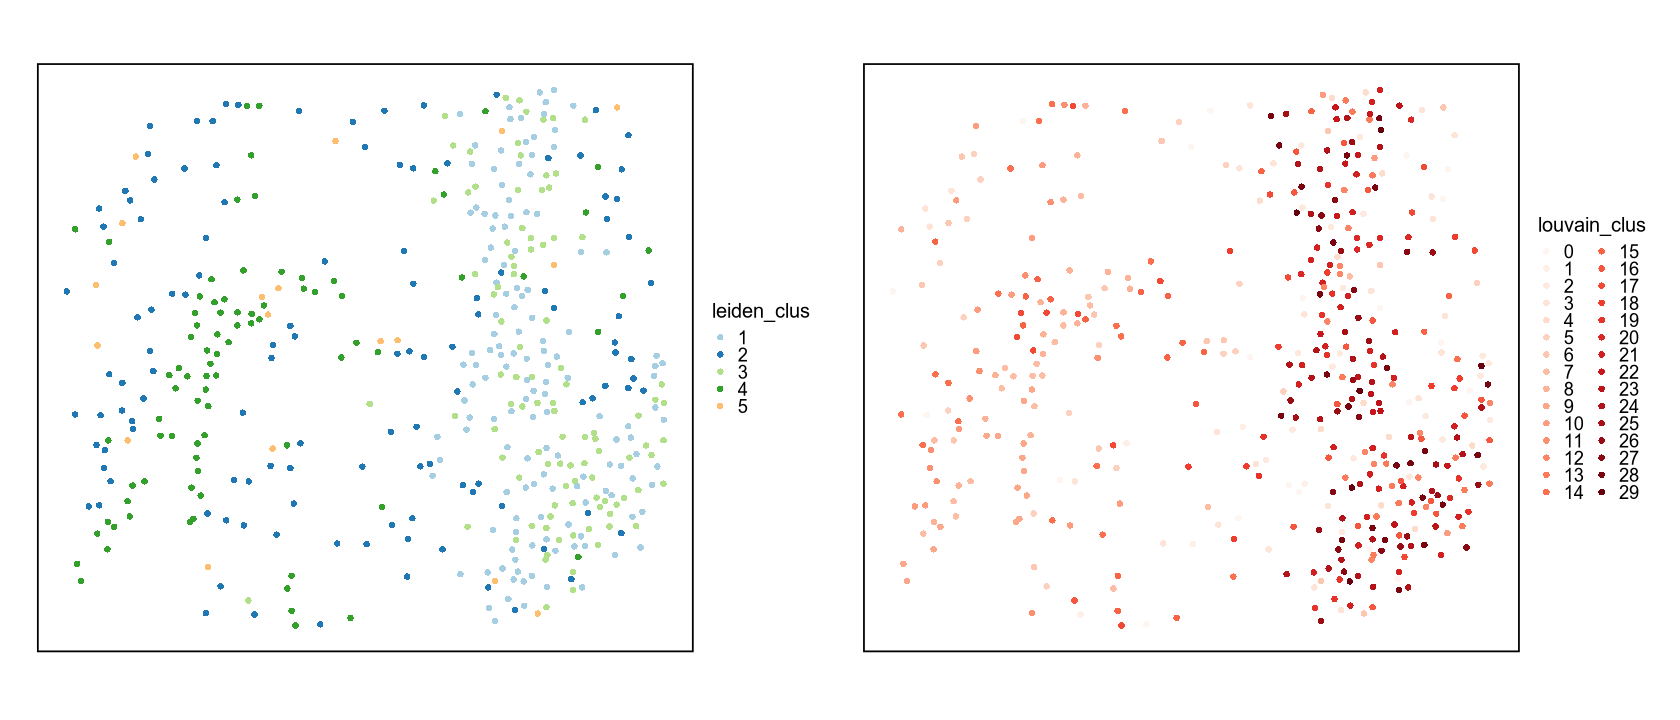

In [18]:
options(repr.plot.width = 14, repr.plot.height = 6)

g@cell_metadata$aggregate$rna$leiden_clus <- factor(g@cell_metadata$aggregate$rna$leiden_clus)
g@cell_metadata$aggregate$rna$louvain_clus <- factor(g@cell_metadata$aggregate$rna$louvain_clus)

p1 <- SpatDimPlot(g, group_by = "leiden_clus", spat_unit = "aggregate")
p2 <- SpatDimPlot(g, group_by = "louvain_clus", spat_unit = "aggregate", palette = "Reds")

p1 + p2

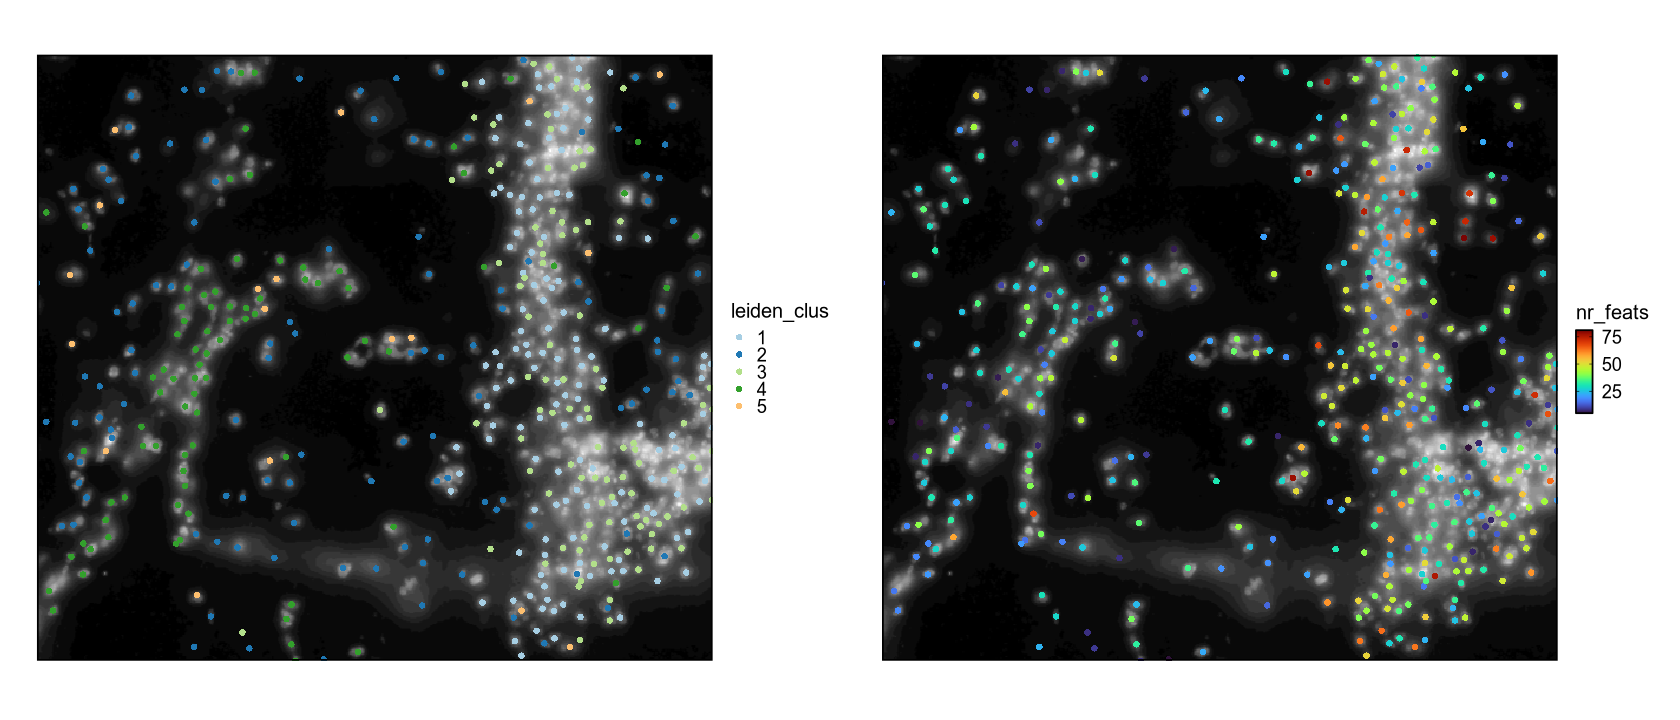

In [22]:
options(repr.plot.width = 14, repr.plot.height = 6)

p1 <- SpatDimPlot(g, image = "dapi_z0", group_by = "leiden_clus", spat_unit = "aggregate")
p2 <- SpatFeaturePlot(g, image = "dapi_z0", features = "nr_feats", spat_unit = "aggregate")

p1 + p2

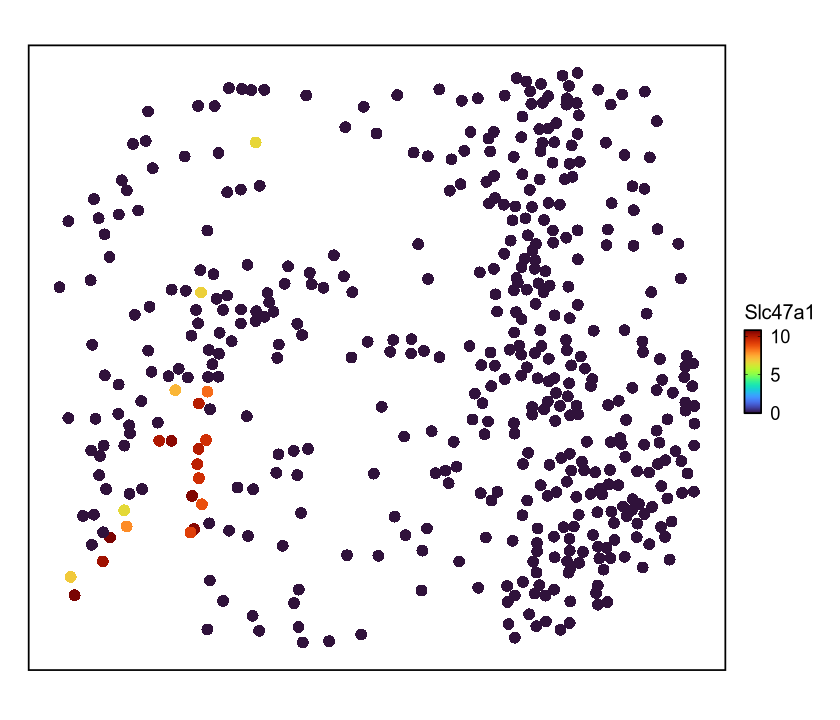

In [27]:
options(repr.plot.width = 7, repr.plot.height = 6)

p1 <- SpatFeaturePlot(g, features = "Slc47a1", spat_unit = "aggregate",
    size = 3)
p1

ℹ Loading scplotter


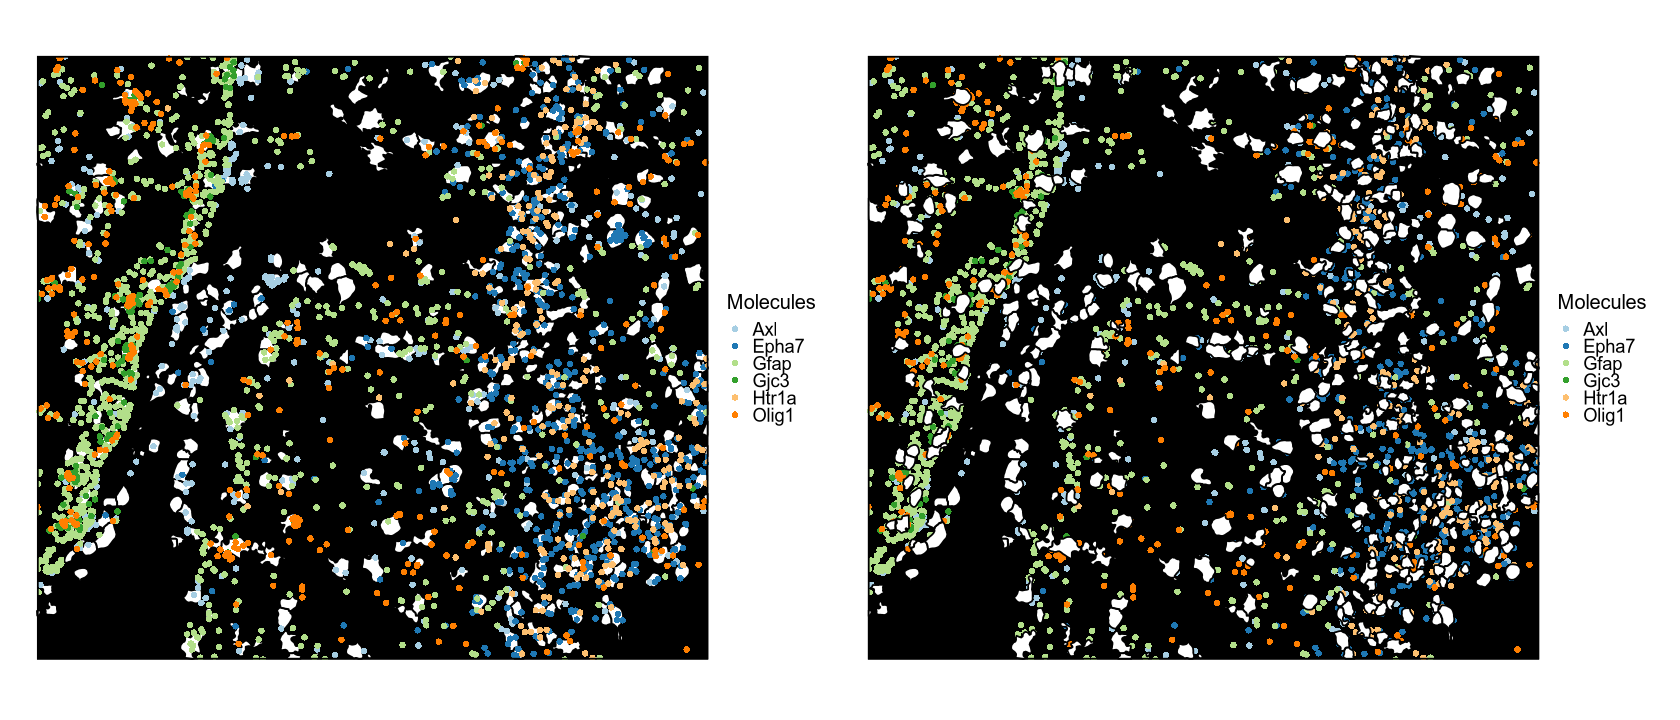

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 6)

p1 <- SpatDimPlot(g, features = c("Oxgr1", "Htr1a", "Gjc3", "Axl", "Gfap", "Olig1", "Epha7"),
    shapes_feat_type = "z0", shapes = TRUE, image = "black", shapes_fill_by = "white",
    shapes_alpha = 1)
p2 <- SpatDimPlot(g, features = c("Oxgr1", "Htr1a", "Gjc3", "Axl", "Gfap", "Olig1", "Epha7"),
    shapes_feat_type = "z0", shapes = TRUE, image = "black", shapes_fill_by = "white",
    #                          put shpaes on top of points
    shapes_alpha = 1, layers = c("image", "points", "shapes"))

p1 + p2

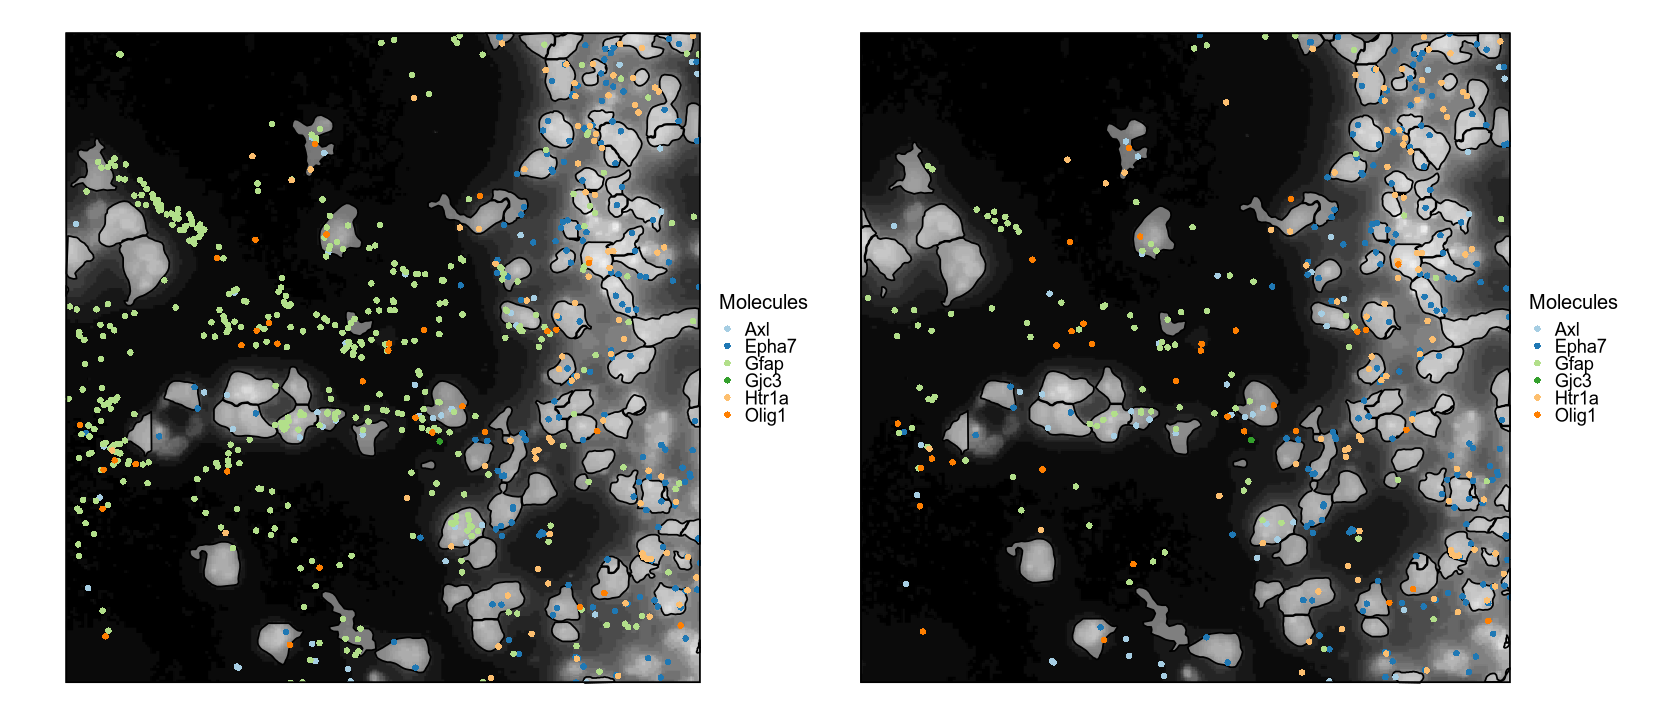

In [57]:
# Zoom in further and visualize with image
vizgen_subcellular_zoom <- subsetGiottoLocs(
    g, poly_info = "z0",
    x_min = 6600, x_max = 6800, y_min = -5000, y_max = -4800)

options(repr.plot.width = 14, repr.plot.height = 6)
p1 <- SpatDimPlot(vizgen_subcellular_zoom, image = TRUE,
    features = c("Oxgr1", "Htr1a", "Gjc3", "Axl", "Gfap", "Olig1", "Epha7"),
    shapes_feat_type = "z0", shapes = TRUE)
p2 <- SpatDimPlot(g, image = TRUE, ext = c(6600, 6800, -5000, -4800),  # use ext to zoom in
    features = c("Oxgr1", "Htr1a", "Gjc3", "Axl", "Gfap", "Olig1", "Epha7"),
    shapes_feat_type = "z0", shapes = TRUE)

p1 + p2


In [11]:
x <- sessionInfo()
x <- capture.output(print(x))
# hide the BLAS/LAPACK paths
x <- x[!startsWith(x, "BLAS/LAPACK:")]
cat(paste(x, collapse = "\n"))

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scplotter_0.4.0   Giotto_4.2.1      GiottoClass_0.4.7

loaded via a namespace (and not attached):
  [1] fs_1.6.6                    matrixStats_1.5.0          
  [3] spatstat.sparse_3.1-0       bitops_1.0-9               
  [5] sf_1.0-20                   devtools_2.4.5             
  [7] httr_1.4.7         